In [4]:
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 통계모델들...
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# T-test, ANOVA

- T-test, ANOVA 는 통계 기반 데이터 분석의 기본 방법론 중 하나

- 집단 내 혹은 집단 간의 평균값 차이가 통계적으로 유의미한 것인지 알아내는 방법
    - 예) 쇼핑몰의 지역별 객단가를 분석한다면
    - A지역의 고객별 평균 매출 : 67,000원
    - B지역의 고객별 평균 매출 : 68,500원
    - 이때, 1500원의 차이가 우연적인 차이인지 , 통계적으로 유의미한 차이인지를 알아보기 위해 사용

- T-test 는 두 집단의 평균 차이를 분석할 때 사용

- ANOVA 는 두 집단 이상일때 사용

- T-test 는 분석하고자 하는 변수가 양적 변수이며, 정규분포이며, 등분산성이라는 조건이 충족되어야함

- 평균의 차이가 클수록, 표본의 수가 많을수록 귀무가설이 기각될 가능성이 커지고,

- 관측치들의 값 간 표준 편차가 크면 평균의 차이가 불분명해지고 귀무가설이 채택될 가능성이 커짐

    - 각 고객들의 마케팅 프로그램 전과 후의 매출 차이가 들쑥날쑥하면 매출 평균차이가 우연에 의한 것일 확률이 높다고 판단 => 우연이구나! => 귀무가설 그대로~

In [6]:
df = pd.read_csv("./data/Golf_test.csv")
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


- A, B, C 세개 타입의 골프공의 비거리 테스트 결과 데이터

- 각 타입의 골프공을 특정 처리를 하기 전과 후로 구분

In [7]:
df.shape

(50, 6)

In [8]:
df.dtypes

TypeA_before    int64
TypeA_after     int64
TypeB_before    int64
TypeB_after     int64
TypeC_before    int64
TypeC_after     int64
dtype: object

In [10]:
df.isna().sum()

TypeA_before    0
TypeA_after     0
TypeB_before    0
TypeB_after     0
TypeC_before    0
TypeC_after     0
dtype: int64

In [11]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


#### describe 리뷰

- 평균값은 270 내외의 값을 가지고 있으며, before 보다 after 가 큰 경향이 있음

- B,C,A 순으로 평균값이 큼

- 비거리 평균의 차이가 통계적으로 유의미한 차이인지 확인

In [16]:
# 높으신 분의 입김으로 회사는 날아갈수있어요
# 우리의 사업은 잘못된것이 아니다라고 윗사람에게 설득해야함

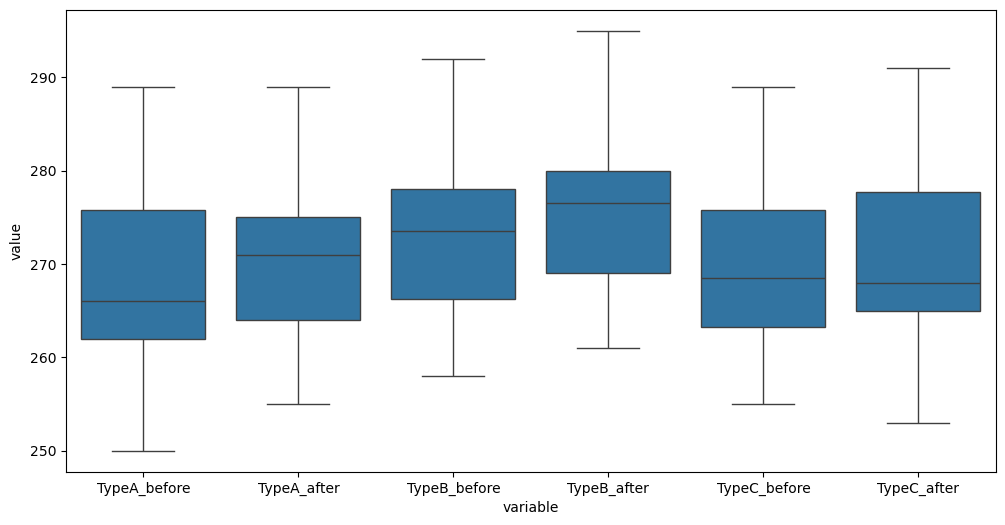

In [18]:
# 그룹별 박스 플롯 시각화

df2 = pd.melt(df) # 컬럼을 값으로 녹였네!
df2
# 박스플롯을 그릴때 이렇게 생긴게 용이함!

plt.figure(figsize=(12,6))
sns.boxplot(
    x = "variable",
    y = "value",
    data = df2
)
plt.show()

- 컬럼별 차이를 직관적으로 확인하기 위해 박스플롯 시각화

In [21]:
# 데이터 정규성 검정
print("TypeA_before:" , stats.shapiro(df["TypeA_before"]))
print("TypeA_after:", stats.shapiro(df["TypeA_after"]))

print("TypeB_before:", stats.shapiro(df["TypeB_before"]))
print("TypeB_after:", stats.shapiro(df["TypeB_after"]))

print("TypeC_before:", stats.shapiro(df["TypeC_before"]))
print("TypeC_after:", stats.shapiro(df["TypeC_after"]))

TypeA_before: ShapiroResult(statistic=np.float64(0.9655377158052212), pvalue=np.float64(0.15154941346876938))
TypeA_after: ShapiroResult(statistic=np.float64(0.9728279567361319), pvalue=np.float64(0.30051020169283893))
TypeB_before: ShapiroResult(statistic=np.float64(0.9730037974106026), pvalue=np.float64(0.305345354286895))
TypeB_after: ShapiroResult(statistic=np.float64(0.9693011028933032), pvalue=np.float64(0.2167560294629035))
TypeC_before: ShapiroResult(statistic=np.float64(0.9595516780117022), pvalue=np.float64(0.08512947305030288))
TypeC_after: ShapiroResult(statistic=np.float64(0.946983211173158), pvalue=np.float64(0.02568194780152731))


- pvalue 값이 0.05 를 초과하면 정규성을 만족

- 아니면 정규성을 만족하지 않음!

- TypeC_after 는 정규성을 통과하지 못했기때문에 이상치 처리나 스케일링 등을 적용해서 정규성 갖도록 해야 신뢰성 있는 검정 가능

In [23]:
# 데이터 정규성 검정
print("TypeA_before:" , stats.shapiro(df["TypeA_before"]).pvalue > 0.05)
print("TypeA_after:", stats.shapiro(df["TypeA_after"]).pvalue > 0.05)

print("TypeB_before:", stats.shapiro(df["TypeB_before"]).pvalue > 0.05)
print("TypeB_after:", stats.shapiro(df["TypeB_after"]).pvalue > 0.05)

print("TypeC_before:", stats.shapiro(df["TypeC_before"]).pvalue > 0.05)
print("TypeC_after:", stats.shapiro(df["TypeC_after"]).pvalue > 0.05)

TypeA_before: True
TypeA_after: True
TypeB_before: True
TypeB_after: True
TypeC_before: True
TypeC_after: False


In [25]:
# 데이터 등분산성 검정
stats.bartlett(df["TypeA_before"],df["TypeA_after"],
               df["TypeB_before"],df["TypeB_after"],
               df["TypeC_before"],df["TypeC_after"],
              )

BartlettResult(statistic=np.float64(6.163016405192418), pvalue=np.float64(0.290678392934973))

- pvalue 가 0.05 를 초과하면 등분산성을 만족

- 대응표본 t검정과 독립표본 t검정 차이

||독립표본 t-검정| 대응표본 t-검정|
|:--|:--|:--|
|비교대상|서로 다른 두 그릅 비교|같은 집단에서 두번 측정(전후비교)|
|데이터 특징|두 그룹이 서로 독립적| 같은 개체에서 반복측정|
|예시|A회사와 B회사의 직원 평균 연봉 비교|운동 전후 체중 변화 비교|
|함수|ttest_ind|ttest-rel|

In [26]:
# 대응표본 t-검정 수행
stats.ttest_rel(df["TypeA_before"],df["TypeA_after"])

TtestResult(statistic=np.float64(-1.221439914972903), pvalue=np.float64(0.227763764486876), df=np.int64(49))

- pvalue 값이 0.05 보다 크므로 TypeA_before 집단과 TypeA_after집단이 거의 변화가 없다는 뜻
- 통계값이 올랐는데요! => 우연하게 된 거에요~

In [27]:
stats.ttest_rel(df["TypeB_before"],df["TypeB_after"])

TtestResult(statistic=np.float64(-34.99999999999999), pvalue=np.float64(2.4886054257756526e-36), df=np.int64(49))

- B골프공은 굉장히 pvalue 가 낮게 나왔죵
- 아주 통계에 유의미하다!
- 전후의 차이가 있다! 우연히 아니다!!!!

In [29]:
# 독립표본 t검정 수행
# 평균이 우연하게 나온 값인지 체크
stats.ttest_ind(df["TypeA_before"],df["TypeB_after"], equal_var = True)

TtestResult(statistic=np.float64(-4.161667341162263), pvalue=np.float64(6.790492395211296e-05), df=np.float64(98.0))

- pvalue가 6.790492395211296e-05 귀무가설 기각됨
- 유의미하다
- 평균은 아주 정확하다!

# ANOVA

- T-test 는 두 집단의 **평균 차이**를 검정하는 방법

- 세 집단 이상의 평균을 검정할 때는 ANOVA 를 사용

- T-test를 사용하여 세 집단 이상을 분석할 때는 A와 B를 검정하고 B와 C를 검정하고 A와 C를 검정하는 방법을 사용

- <b style="color:red">하지만! 신뢰도가 하락하는 문제가 있어 일반적으로 집단이 3개 이상일때는 ANOVA 사용</b>

- ANOVA 의 일반적인 가설
    - H0(귀무가설) : 독립변수의 차이에 따른 종속변수는 동일하다.
    - H1(대립가설) : 독립변수의 차이에 따른 종속변수는 다르다.

- ANOVA는 독립변수 수에 따라 다르게 불림
    - 예) 고객들의 객단가 평균 차이를 비교하기 위한 요인이 '지역' 하나라면 일원 분산분석(one-way ANOVA)
    - '지역', '연령대' 두가지라면 이원 분산분석(two-way ANOVA), 더 많으면 N원 분산 분석(N-way ANOVA) 라고 함

- ANOVA 를 사용할 때 독립변수는 집단을 나타낼 수 있는 범주형 변수여야 하며, 종속 변수는 연속형 변수여야 함
    - 독립변수와 종속변수가 연속형일때는 회귀 분석
    - 독립변수와 종속변수가 범주형일 때는 교차 분석을 사용 ex) 성별에 따른 흡연 (남,여/흡연,비흡연)

<b style="color:pink; font-size:30px;">x축이랑 y축에 뭘 표현하고 싶은거냐<br/>
=> 스스로 생각하세용</b>

In [30]:
# ANOVA 의 이해를 돕기위한 그림

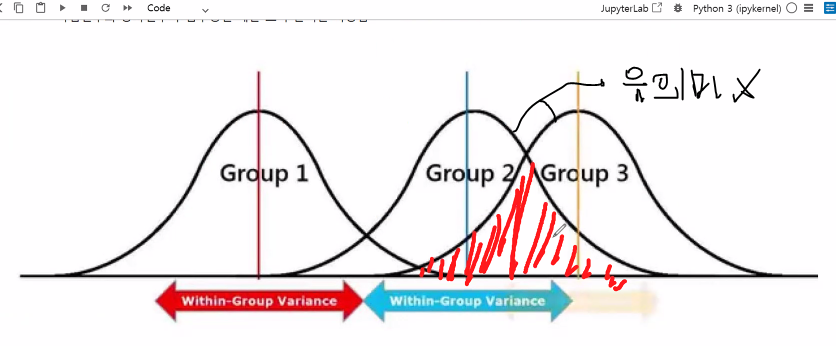

- ANOVA 는 각 집단의 평균이 서로 멀리 떨어져 있어 집단 평균의 분산이 큰 정도를 따져서 집단 간 평균이 다른지 판별
    - 집단 내 각 관측지들이 집단 평균으로 부터 얼마나 퍼져 있는지 나타내는 집단 내 분산
    - 전체 집단의 통하 평균과 각 집단의 평균값이 얼마나 퍼져있는지 를 나타내는 집단 간 분산이 사용됨
- 예) 집단 2와 집단 3처럼 집단 간의 겹치는 부분이 큰 경우는 각 집단의 평균이 다르다고 보기 어려움

- 반면에 집단 1 의 평균은 멀리 떨어져 있어 집단 간 평균 차이가 확실히 난다
- 집단 간 평균의 분산을 집단 내 분산으로 나눈 값이 유의도 임계치를 초과하는 지 여부에 따라 집단 간 평균의 차이를 검정

- ANOVA 분석의 결과만으로는 각 집단의 평균이 모두 다른 것인지 일부만 다른 것인지는 알 수 없음!
    - 일부 집단들은 집단간 차이가 없을 수 있음
    - 이러한 1종 오류 ( 귀무가설이 참인데 거짓이라고 기각하는 오류)를 방지하기 위해서 사후검증을 수행
- 사후검증은 집단 크기가 같을 때 사용하는 <b style="color:red;">Tukey 의 HSD 검증, 집단 크기가 다를때 사용하는 scheffe 검증 방법</b>이 있음~

In [32]:
# 1종오류 : 참인데 불구하고 거짓이라고 하는것. 심각한 오류! ( 무죄인데 유죄땅땅!, 전땅끄를 떠올려 )
# 2종오류 : 거짓인데 불구하고 참이라고 하는것 ( 유죄인데 무죄땅땅 => 그것이 평화니까...)

In [35]:
# 일원분산분석
statistic, pvalue = stats.f_oneway(
    df["TypeA_before"],
    df["TypeB_before"],
    df["TypeC_before"], )


print(f"일원분산 분석 결과: F={statistic:.1f}, p={pvalue:.5f}")

일원분산 분석 결과: F=4.2, p=0.01652


- 정규성 검정과 등분산 검정은 T-test 에서 수행했으니 생략
-  p=0.01652 => 3개의 집단 중 최소한 하나의 집단은 통계적으로 유의미한 차이가 있다.

# 플젝때
### 하나하나의 관측값을 잘 넣으라고!!!!!!!!!!!!!!!!!!!
### 뭐 연산 중간에 낑겨넣던지 이런거 하지말라고!!!!!!!!!!!!!

In [37]:
# 데이터 재구조화
df2 = pd.melt(df)
df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [38]:
df2 = df2[df2["variable"].isin(["TypeA_before","TypeB_before","TypeC_before"])]
df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


- ols 패키지 사용을 위한 전처리

In [39]:
# ols 패키지 아노바 검정
# C : combine 이라는 뜻 variable 이라는 배열을 감싼다는 뜻
model = ols("value ~ C(variable)", df2).fit() # R과 비슷까리하게 생겼음! 종속~독립(일본만화처럼읽으면됨)
print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


- 앞서 수행한 ANOVA 검정과 동일한 결과

- 데이터셋의 형태에 따라 사용하기 편한 패키지를 선택하면 됨

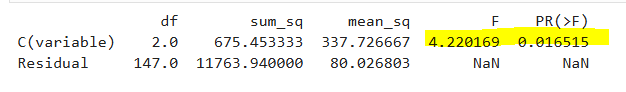

In [40]:
# 사후검정
posthoc = pairwise_tukeyhsd(
    df2["value"], 
    df2["variable"], 
                            
    alpha = 0.05 # 유의기준
)

print(posthoc)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9038 9.3762   True
TypeA_before TypeC_before      1.9 0.5392 -2.3362 6.1362  False
TypeB_before TypeC_before    -3.24 0.1696 -7.4762 0.9962  False
---------------------------------------------------------------


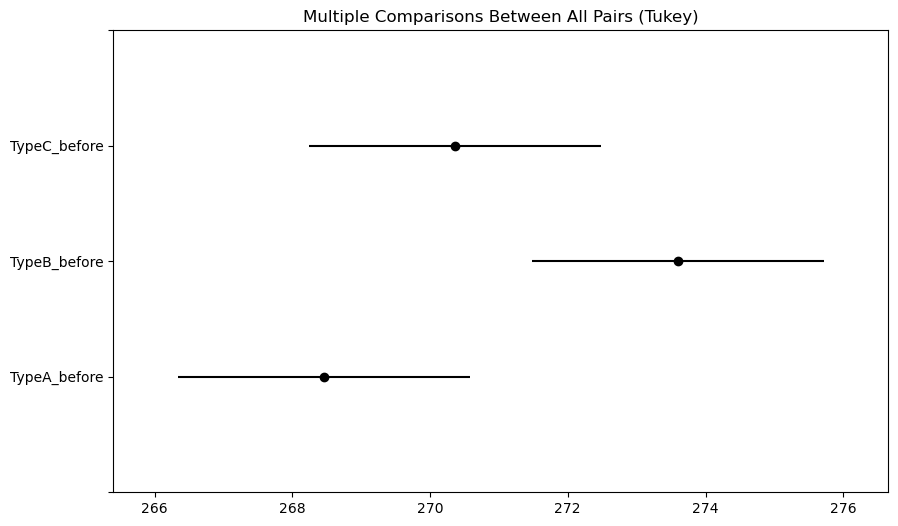

In [41]:
fig = posthoc.plot_simultaneous()

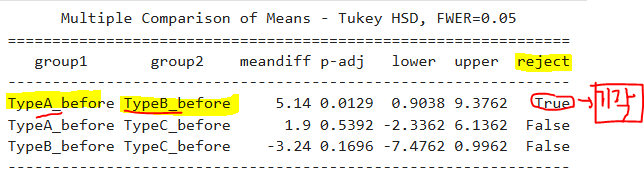

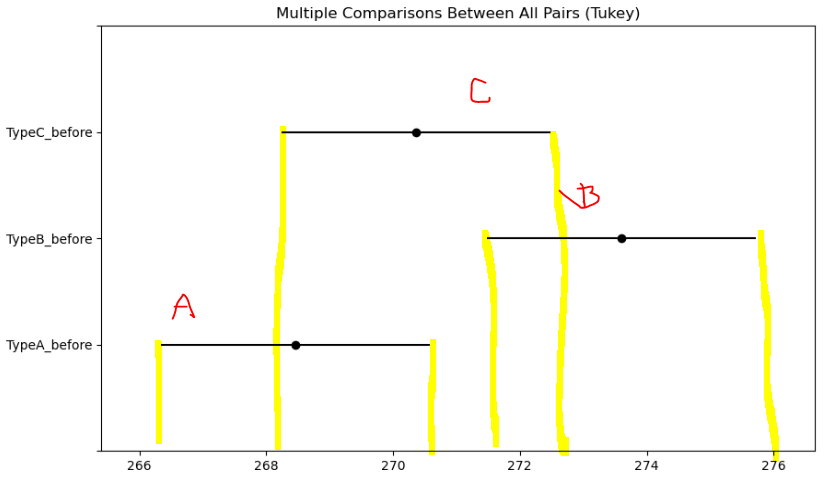

- Tukey 의 HSD 사후검정 수행

- A와 B만 유의미한 차이가 있다!

In [42]:
# 연속형이 아닐때 통계검정을 다음 챕터에서 배우겠다